Predicting the number of positive and negative reviews based on sentiments.

In [ ]:
!pip install wheel
!pip install wordcloud

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\admin\appdata\local\programs\python\python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-l28mievc\\wordcloud_53f20cc2522f4a2c9d4a137b8421ac8a\\setup.py'"'"'; __file__='"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-l28mievc\\wordcloud_53f20cc2522f4a2c9d4a137b8421ac8a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\admin\AppData\Local\Temp\pip-wheel-jd8p_fk6'
       cwd: C:\Users\admin\AppData\Local\Temp\pip-install-l28mievc\wordcloud_53f20cc2522f4a2c9d4a137b8421ac8a\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  cre

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install nltk


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
import sys
print(sys.executable)

c:\users\admin\appdata\local\programs\python\python39\python.exe


In [ ]:
!pip3 install wheel

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
!sys.executable python -m pip install wordcloud

'sys.executable' is not recognized as an internal or external command,
operable program or batch file.


In [54]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from  nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Getting path to the file
import os
import warnings
warnings.filterwarnings('ignore')

os.listdir("/content/")

['.config', 'IMDB Dataset.csv', 'sample_data']

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#importing the dataset
imdb_data=pd.read_csv("/content/drive/MyDrive/ML/IMDB Dataset.csv")

In [7]:
#Getting shape of our dataframe and checking first 5 rows
print(imdb_data.shape)
print(imdb_data.head(5))

(50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Exploratory data analysis

In [8]:
#summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
imdb_data.isna().sum()

review       0
sentiment    0
dtype: int64

In [10]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
#Sentiment Count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Dataset is balanced.

In [12]:
#Splitting the dataset for training and testing
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#Test Dataset
test_reviews=imdb_data.review[:10000]
test_sentiments=imdb_data.sentiment[:10000]
#checking shape after splitting
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


Preprocessing the  Text

In [13]:
#Tokenization of text
tokenizer=ToktokTokenizer()

In [14]:
#Setting English stopwords

nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
#Removing noise
def strip_html(text):
  soup=BeautifulSoup(text,'html.parser')
  return soup.get_text()

In [16]:
#removing The square brackets
def remov_brackets(text):
  return re.sub('\[[^]]*/]','',text)
  

In [17]:
#Removing the noisy text
def remove_noise(text):
  text=strip_html(text)
  text=remov_brackets(text)
  return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_noise)


In [18]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [19]:
#Text stemming
#Stemming the text
def text_stemmer(text):
  ps=nltk.porter.PorterStemmer()
  text=' '.join([ps.stem(word) for word in text.split()])
  return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(text_stemmer)

In [20]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'shan', "wasn't", "didn't", 'both', 'as', 'now', 'being', 'but', 'of', 've', 'isn', 'them', "that'll", 'has', 'not', 'ain', 'that', "haven't", 'any', 'during', 'or', 'nor', 'so', 'at', 'between', 'there', "aren't", 'didn', 'ours', "shouldn't", 'ma', 'an', 'in', 'yourself', 'what', 'his', 'her', 'a', 'the', 'wouldn', 'when', "couldn't", 'herself', 'o', 'wasn', 'again', 'y', 'couldn', "don't", 'theirs', 'are', 'these', 'itself', 'been', "mustn't", 'its', 'here', 'before', 'be', "you'll", "needn't", 'i', 'our', 'having', 'do', "you've", 'hasn', 'shouldn', 'was', 'should', 'aren', 'yours', 'how', 'very', 'we', 'too', 'more', 'hers', 'above', "hasn't", 'against', 'out', 'each', 'most', 'mightn', 'through', 'by', 'you', 'those', 'mustn', 'other', 'if', 'further', 'yourselves', 'then', 'will', 'needn', 'down', 'myself', 'my', "should've", "isn't", 't', 'she', 'had', 'did', 'few', 'll', "mightn't", 'does', 'can', "you'd", 'he', 'from', 'until', 'once', 'some', 'which', 'with', 'over', 'oursel

In [21]:
#Normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [22]:
#Normalised test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [23]:
#Bags of words model

# It is used to convert text documents to numerical vectors or bag of words.

In [24]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews[:40000])

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names


BOW_cv_train: (40000, 6209986)
BOW_cv_test: (10000, 6209986)


Term Frequency-Inverse Document Frequency model (TFIDF)

It is used to convert text documents to matrix of tfidf features.

In [25]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209986)
Tfidf_test: (10000, 6209986)


In [26]:
#Labeling the sentiment text

#labeling the sentiment data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [27]:
#Split the sentiment tdata

#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)


[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [28]:
# Modelling the dataset

# Let us build logistic regression model for both bag of words and tfidf features

#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [29]:
# Logistic regression model performane on test dataset

#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [30]:
# Accuracy of the model

#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)
# lr_bow_score : 0.7512
# lr_tfidf_score : 0.75

lr_bow_score : 0.7511
lr_tfidf_score : 0.7499


In [31]:
# Print the classification report

#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [32]:
# Confusion matrix

#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3766 1241]
 [1248 3745]]
[[3661 1346]
 [1155 3838]]


<function confusion_matrix at 0x7fb6677d1440>


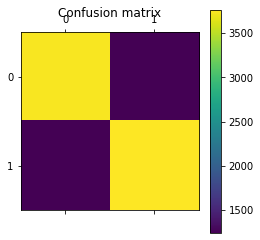

In [57]:
#plotting the Confusion matrix 
confusion_matrix_1 = confusion_matrix(test_sentiments,lr_bow_predict)
print(confusion_matrix)
plt.matshow(confusion_matrix_1)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

[[3661 1346]
 [1155 3838]]


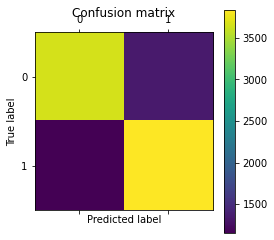

In [59]:
#plotting the Confusion matrix 
confusion_matrix_2 = confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(confusion_matrix_2)
plt.matshow(confusion_matrix_2)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [35]:
# Linear support vector machines for bag of words and tfidf features

#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)


SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [37]:
# Model performance on test data

#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [38]:
# Accuracy of the model

#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5828
svm_tfidf_score : 0.5112


In [39]:
# Print the classification report

#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [60]:
# Plot the confusion matrix

#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4947   60]
 [4112  881]]
[[5007    0]
 [4888  105]]


[[4947   60]
 [4112  881]]


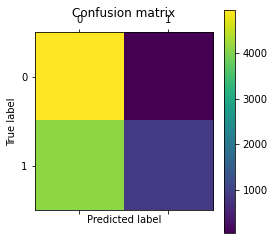

In [64]:
cfm_svm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cfm_svm_bow)
plt.figsize=(50,50)
plt.matshow(cfm_svm_bow)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[[5007    0]
 [4888  105]]


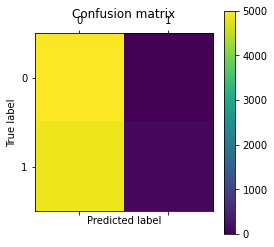

In [65]:
cfm_svm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cfm_svm_tfidf)
plt.figsize=(50,50)
plt.matshow(cfm_svm_tfidf)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
# Multinomial Naive Bayes for bag of words and tfidf features

#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [43]:
# Model performance on test data

#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [44]:
#Accuracy of the model

#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7509
mnb_tfidf_score : 0.7508


In [45]:
# Print the classification report

#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [61]:
# Plot the confusion matrix

#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3735 1272]
 [1219 3774]]
[[3728 1279]
 [1213 3780]]


[[3735 1272]
 [1219 3774]]


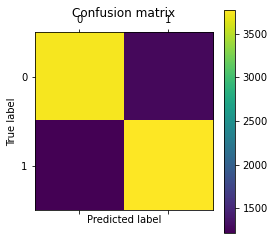

In [62]:
cfm=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cfm)
plt.figsize=(50,50)
plt.matshow(cfm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[[3728 1279]
 [1213 3780]]


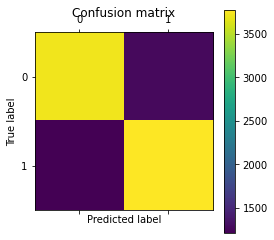

In [63]:
cfm1=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cfm1)
plt.figsize=(50,50)
plt.matshow(cfm1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<function matplotlib.pyplot.show>

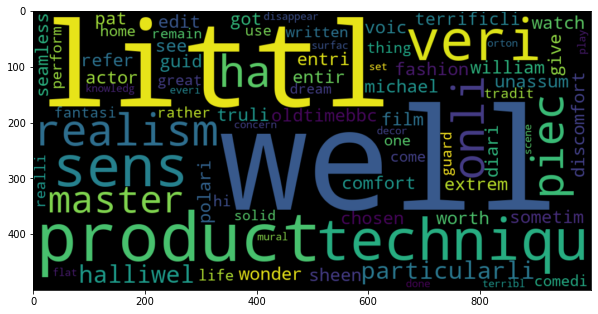

In [48]:
# Let us see positive and negative words by using WordCloud.

# Word cloud for positive review words

#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

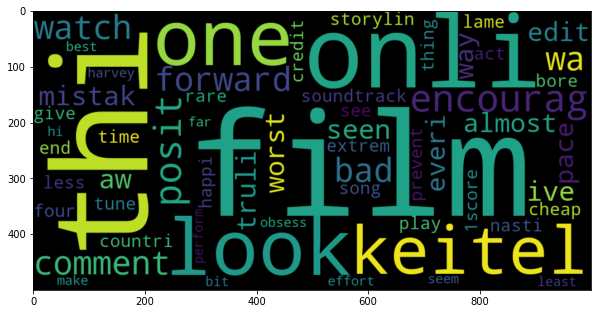

In [49]:
# Word cloud for negative review words

#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [50]:
# Conclusion:
# We can observe that both logistic regression and multinomial naive bayes model performing well compared to linear support vector machines.
# Still we can improve the accuracy of the models by preprocessing data and by using lexicon models like Textblob.